Objective: To predict medical cost billed by insurance company for an individual. <br> 
<br>
In this study we'll use 3 ways of forming Linear regression models. We'll also see how the gradient descent works in getting the model behind the curtains. <br>
<br>
Next, we'll also the evaluatio of each model formed.<br>
<br>
Lastly we'll compare the compare the models formed usin different ways.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8,5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns in the dataset. 3 of them categorical, and 4 numerical. There are no null values present.

<Figure size 1000x500 with 0 Axes>

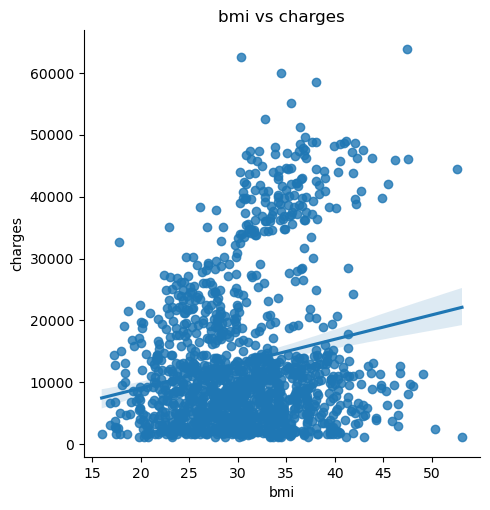

In [4]:
plt.figure(figsize = (10,5))
sns.lmplot('bmi','charges', data = df)
plt.title('bmi vs charges')
plt.show()

In [5]:
# statistical information 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Now we will do some pre-analysis on the dataset. Like checking for missing values, duplicates etc.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Text(0.5, 1.0, 'Heatmap for checking missing values in dataset')

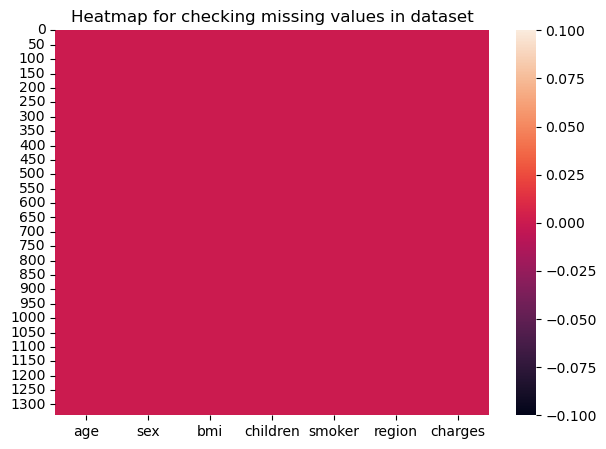

In [6]:
# Check for missing values
print(df.isnull().sum())

# for visualization
plt.figure(figsize = (7,5))
sns.heatmap(df.isnull())
plt.title('Heatmap for checking missing values in dataset')

In [7]:
df[df.duplicated(keep = 'first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df2 = df.drop_duplicates(keep = 'first')
df2.shape

(1337, 7)

## EDA

First let's check for correlation among variables.

Text(0.5, 1.0, 'Heatmap for correlation among variables')

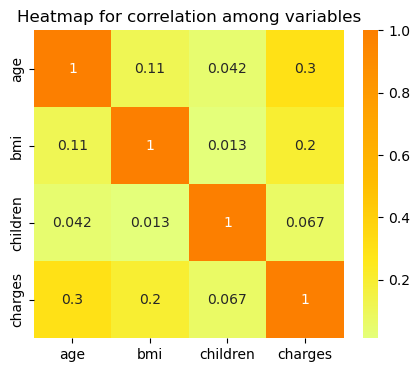

In [9]:
plt.figure(figsize = (5,4))
sns.heatmap(df2.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for correlation among variables')

### Univariate Analysis

Next we'll check the distribution of different numerical columns like 'charges' and 'bmi'

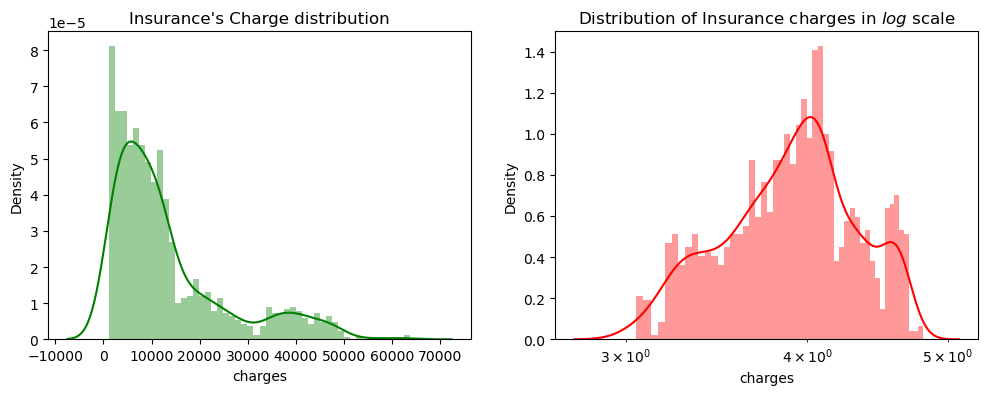

In [10]:
fi = plt.figure(figsize = (12,4))

ax = fi.add_subplot(121)
sns.distplot(df['charges'],color = 'g', bins = 50 , ax = ax)
ax.set_title("Insurance's Charge distribution")

ax = fi.add_subplot(122)
sns.distplot(np.log10(df['charges']), color = 'r', bins = 50, ax = ax)
ax.set_title('Distribution of Insurance charges in $log$ scale')
ax.set_xscale('log')

First plot of charges is 'right skewed' distribution. Upon log transformation it seems to become more normal.

Text(0.5, 1.0, 'Age distribution of individuals')

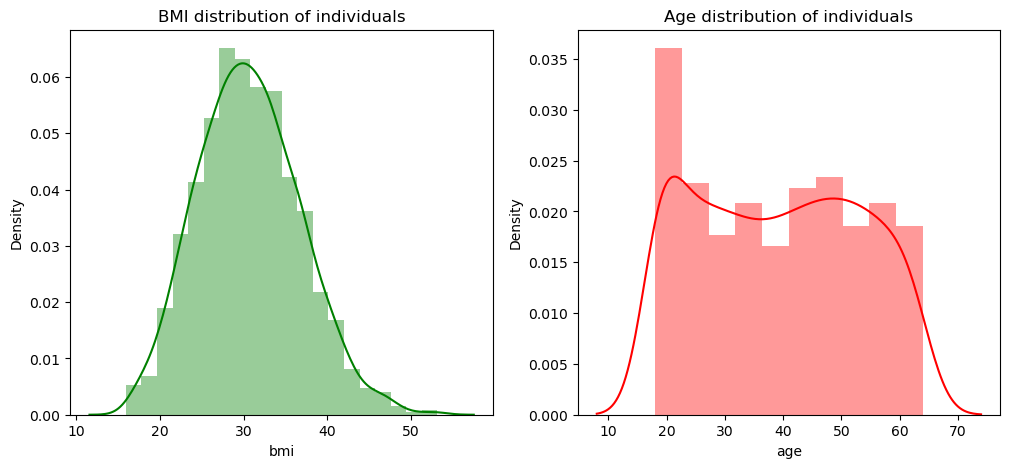

In [11]:
fi = plt.figure(figsize = (12,5))

ax = fi.add_subplot(121)
sns.distplot(df['bmi'],color = 'g', bins = 20 )
ax.set_title("BMI distribution of individuals")

ax = fi.add_subplot(122)
sns.distplot(df['age'], color = 'r', bins = 10)
ax.set_title('Age distribution of individuals')

Text(0.5, 1.0, 'Countplot of the regions individuals belong to')

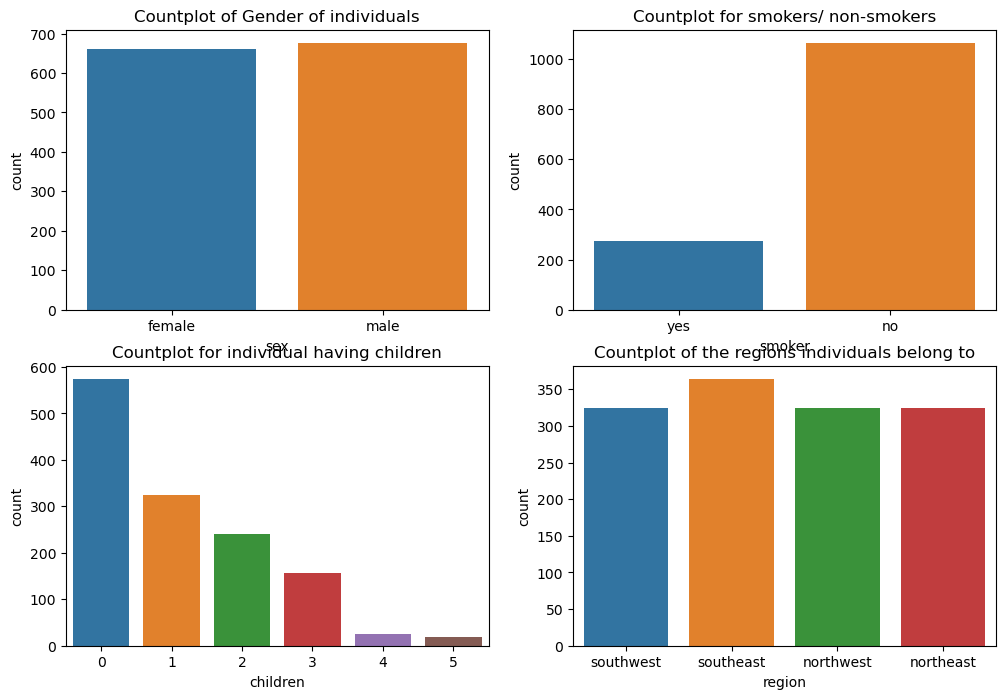

In [12]:
fi = plt.figure(figsize = (12,8))

ax = fi.add_subplot(221)
sns.countplot(df['sex'], ax = ax)
ax.set_title('Countplot of Gender of individuals')

ax=  fi.add_subplot(222)
sns.countplot(df['smoker'], ax = ax)
ax.set_title('Countplot for smokers/ non-smokers')

ax = fi.add_subplot(223)
sns.countplot(df['children'], ax = ax)
ax.set_title('Countplot for individual having children')

ax = fi.add_subplot(224)
sns.countplot(df['region'], ax = ax)
ax.set_title('Countplot of the regions individuals belong to')

- Males and females are almost equal in count.
- Non-smoker count is greater than those of smokers.
- More individuals who have registered themselves for insurance do no have any children. And as the count of children they have increases, count of such individual decreases.
- Individuals for insurance are well spread out from all the four regions. South-east region have slightly higher count of customers than other regions.

### Bivariate Analysis

In [13]:
categ_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(categ_cols, num_cols)

['sex', 'smoker', 'region'] ['age', 'bmi', 'children', 'charges']


Text(0.5, 1.0, 'Gender vs bmi')

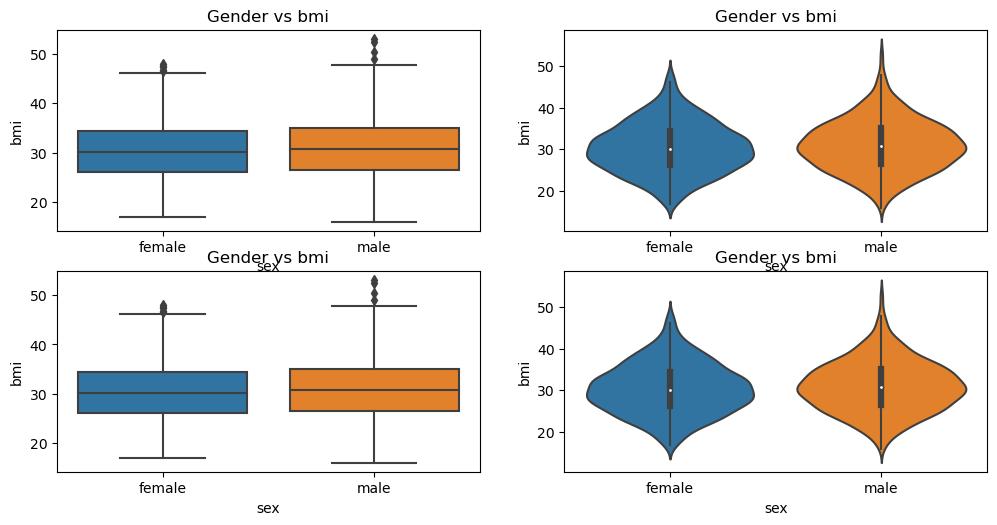

In [14]:
fi = plt.figure(figsize = (12,12))
# gender vs age
ax = fi.add_subplot(421)
sns.boxplot(df['sex'], df['bmi'])
ax.set_title('Gender vs bmi')

ax = fi.add_subplot(422)
sns.violinplot(df['sex'], df['bmi'])
ax.set_title('Gender vs bmi')

ax = fi.add_subplot(423)
sns.boxplot(df['sex'], df['bmi'])
ax.set_title('Gender vs bmi')

ax = fi.add_subplot(424)
sns.violinplot(df['sex'], df['bmi'])
ax.set_title('Gender vs bmi')

# gender vs bmi

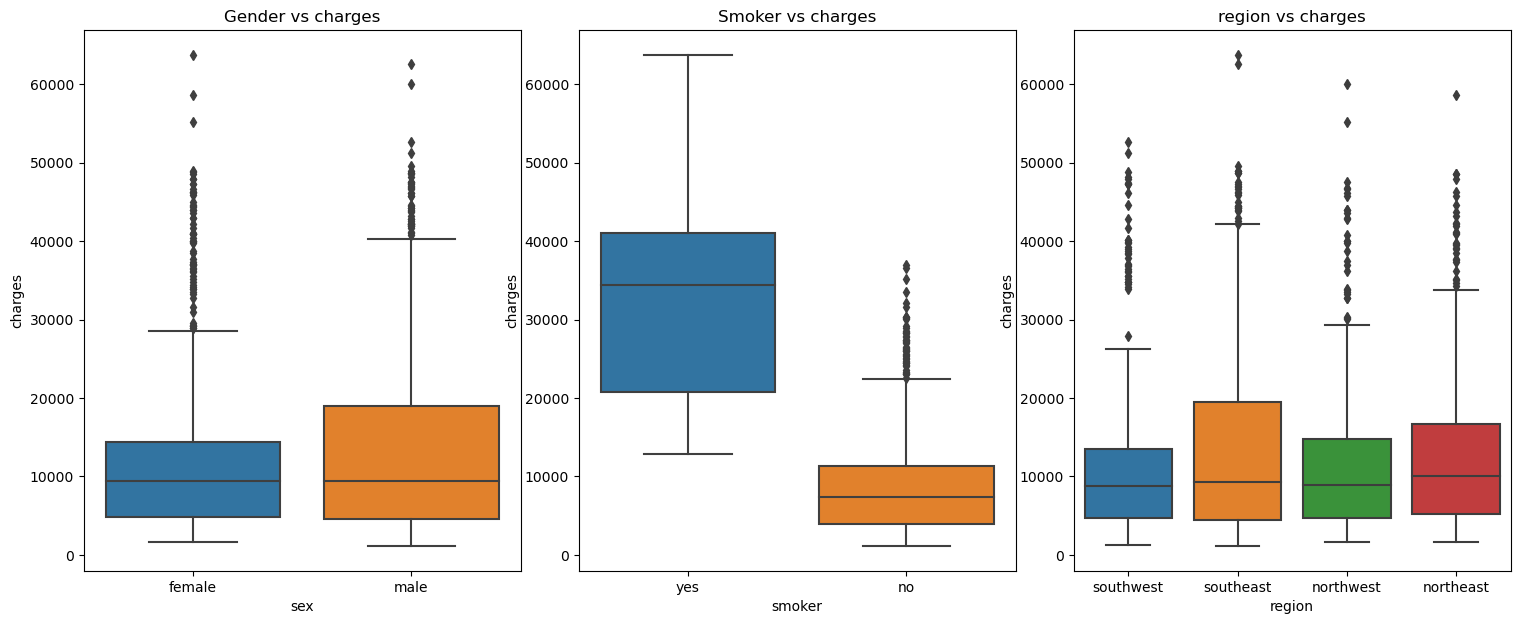

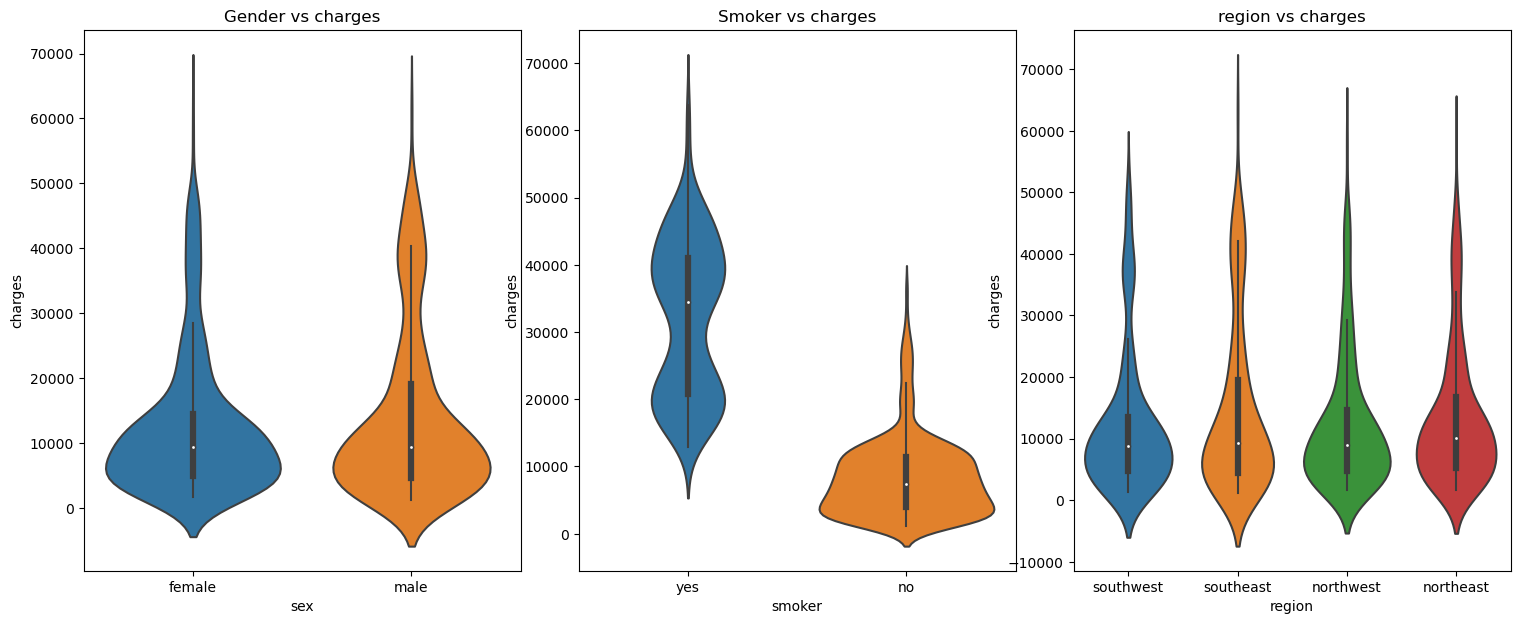

In [15]:
# BOXPLOTS
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
fig.tight_layout()

sns.boxplot(df['sex'], df['charges'], data = df, ax = axes[0]).set_title("Gender vs charges")
sns.boxplot(df['smoker'], df['charges'], data =df , ax = axes[1]).set_title('Smoker vs charges')
sns.boxplot(df['region'], df['charges'], data = df, ax = axes[2]).set_title('region vs charges')
plt.show()

# VIOLIN PLOTS
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
fig.tight_layout()
sns.violinplot(df['sex'], df['charges'], data = df, ax = axes[0]).set_title("Gender vs charges")
sns.violinplot(df['smoker'], df['charges'], data =df , ax = axes[1]).set_title('Smoker vs charges')
sns.violinplot(df['region'], df['charges'], data = df, ax = axes[2]).set_title('region vs charges')
plt.show()

- For smokers, min insurance charges is almost equal to the insurance of charges of non-smokers. This means insurance charge of smokers is very high as compare to that of non-smokers. 
- Insurance charges aren't gender biased. They are similar to both.
- Median Insurance charges seems to be same through all regions. However, certain regions like southeast and northeast have bigger bracket of possible insurance charges. This implies that smokers in these regions are high. <br>
<br>
To support this, following visualization can help.

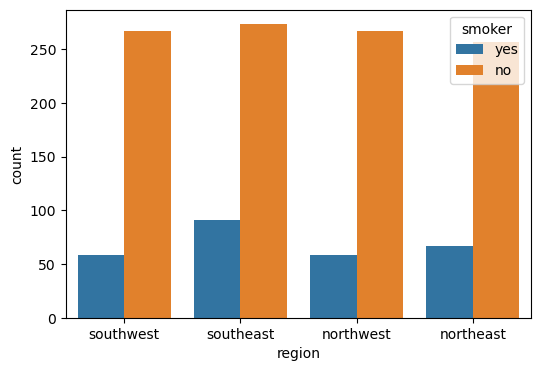

In [16]:
plt.figure(figsize = (6,4))
sns.countplot(df['region'], hue = df['smoker'], data = df)
plt.show()

#### How is insurance charges per individual changing with the number of children they have?

Text(0.5, 1.0, 'Boxplot of charges vs children')

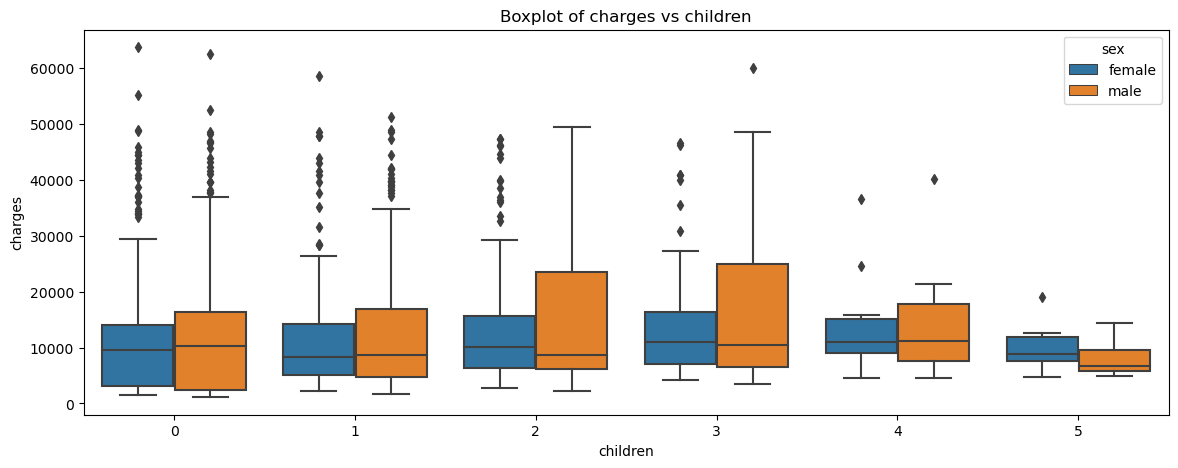

In [17]:
plt.figure(figsize = (14,5))
sns.boxplot(df['children'], df['charges'], hue = df['sex'], data = df)
plt.title('Boxplot of charges vs children')

In [18]:
df.groupby(['children'])['charges'].agg(['mean','max','min','count'])

,mean,max,min,count
children,,,,
0,12365.975602,63770.42801,1121.8739,574
1,12731.171832,58571.07448,1711.0268,324
2,15073.563734,49577.66240,2304.0022,240
3,15355.318367,60021.39897,3443.0640,157
4,13850.656311,40182.24600,4504.6624,25
5,8786.035247,19023.26000,4687.7970,18


Text(0.5, 1.0, 'violin plot for charges vs region')

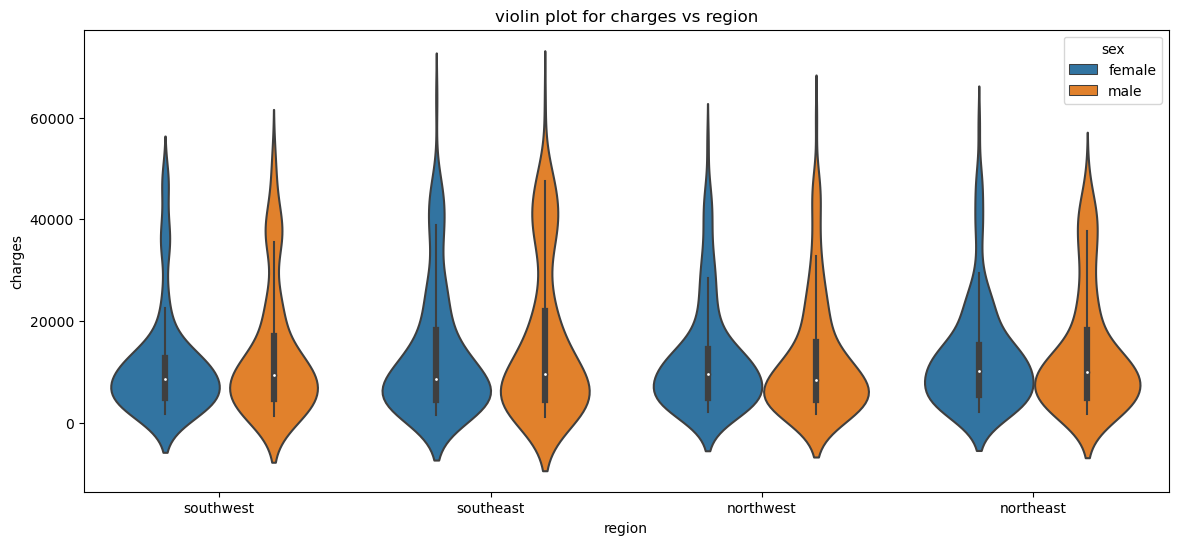

In [19]:
plt.figure(figsize = (14,6))
sns.violinplot(df['region'], df['charges'], hue = df['sex'], data = df)
plt.title('violin plot for charges vs region')

Text(0.5, 1.0, 'BMI vs charges')

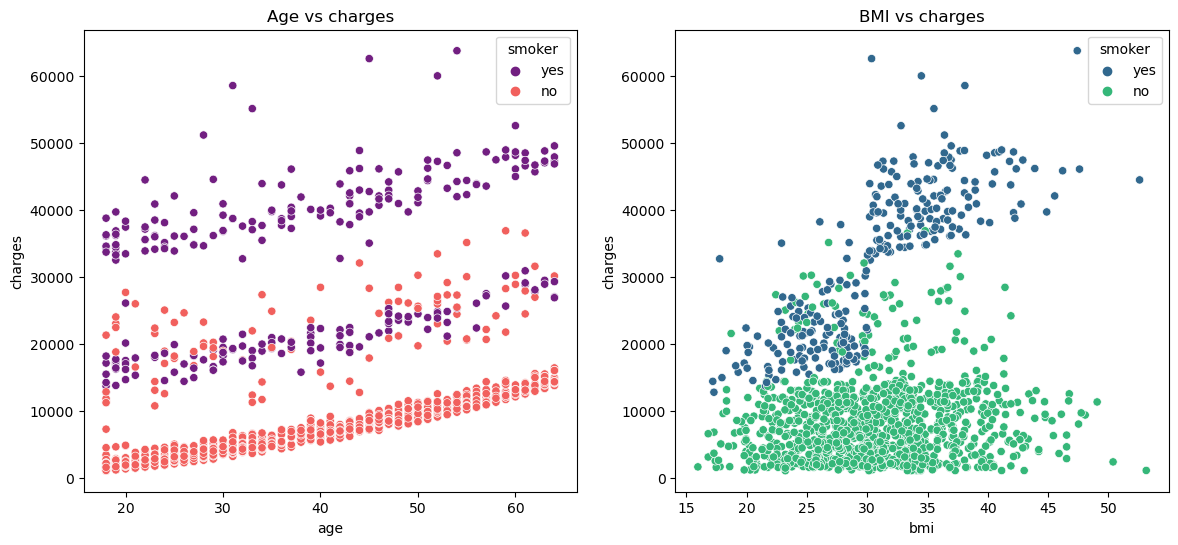

In [20]:
fi = plt.figure(figsize = (14,6))

ax = fi.add_subplot(121)
sns.scatterplot(df['age'], df['charges'], data =  df, hue = 'smoker', palette = 'magma').set_title('Age vs charges')

ax = fi.add_subplot(122)
sns.scatterplot(df['bmi'], df['charges'], data =  df, hue = 'smoker', palette = 'viridis').set_title('BMI vs charges')

Individual who are smokers are cherged more than non-smokers. Smoker are distributed among all age groups. In the left chart there seem to be three clusters as per insurance charges are being made. The top most slab/ cluster consists only smokers. Lowest slab/cluster consist of only non-smoker individual. Whereas the middle cluster has both sort of individuals smokers and non-smokers.


In [21]:
print('data about smoker vs charges')
print(df.groupby(['smoker'])['charges'].agg(['mean', 'min','max','count']))
print()
print('data about smoker vs bmi')
print(df.groupby(['smoker'])['bmi'].agg(['mean', 'min','max','count']))

data about smoker vs charges
                mean         min          max  count
smoker                                              
no       8434.268298   1121.8739  36910.60803   1064
yes     32050.231832  12829.4551  63770.42801    274

data about smoker vs bmi
             mean     min    max  count
smoker                                 
no      30.651795  15.960  53.13   1064
yes     30.708449  17.195  52.58    274


### Data Pre-processing

#### Enoding

There are 3 categorical columns present in the dataset i.e. 'sex', 'region', 'smoker'. we need to convert them to numerical format. <br> 
Encoding can be done by the method:
- Label encoding: best for binary categories
- One Hot Encoding: for categories less than 6
- Target Encoding: for categories more than 6
<br>
<br>
In this case since we have very less number of categ columns we can use One Hot Encoding and label encoding. Label encoding for columns : 'sex','smoker' and one hot encoding for 'reigon' and 'children'. This can be done in one step instead of doing it individually by just using *pd.get_dummies*

In [22]:
categ_cols = categ_cols + ['children']

In [23]:
df_encoded = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep = '-',
                          columns = categ_cols, drop_first = True, dtype = 'int8')
df_encoded.head()

,age,bmi,charges,OHE-male,OHE-yes,OHE-northwest,OHE-southeast,OHE-southwest,OHE-1,OHE-2,OHE-3,OHE-4,OHE-5
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,0,0
1,18,33.770,1725.55230,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,1,0,1,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,1,0,0,0,0,0,0,0


In [24]:
print(f"The shape of original df {df.shape} and columns are {df.columns}")
print()
print(f'The shape of encoded df {df_encoded.shape} and columns are {df_encoded.columns}')

The shape of original df (1338, 7) and columns are Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

The shape of encoded df (1338, 13) and columns are Index(['age', 'bmi', 'charges', 'OHE-male', 'OHE-yes', 'OHE-northwest',
       'OHE-southeast', 'OHE-southwest', 'OHE-1', 'OHE-2', 'OHE-3', 'OHE-4',
       'OHE-5'],
      dtype='object')


Earlier we noticed that 'charges' distribution is right skewed instead of normal. So, in order to make it normal we'll need to log transform it. We can do this by using boxcox.

In [25]:
from scipy.stats import boxcox
y_bc, lamda, ci_ = boxcox(df_encoded['charges'], alpha = 0.05)
print(y_bc[:5], lamda, ci_)

[12.12897974  8.80859638 10.14752106 12.53495031  9.94563694] 0.043649053770664956 (-0.01140290617294196, 0.0988096859767545)


In [26]:
a,b,c = boxcox(np.log(df_encoded['charges']), alpha = 0.05)
print(a[:5],b,c)

[13.91512356  9.62436139 11.36532123 14.43248425 11.10355757] 1.294052845462269 (0.7995315463977852, 1.791213667183961)


In [27]:
df_encoded['charges'] = np.log(df_encoded['charges'])

The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.

#### Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 23)

#### Building LR model

There are 4 ways we'll be building our LR model.
1. using Sklearn
2. using statsmodel
3. using Normal Equation
4. from scratch using gradient descent

##### 1. Using Sklearn

In [29]:
from sklearn.linear_model import LinearRegression

# building model
lr_sklearn_model = LinearRegression()

In [30]:
# fitting our model with training dataset
lr_sklearn_model.fit(X_train,y_train)

LinearRegression()

In [31]:
sk_weights = [lr_sklearn_model.intercept_] + list(lr_sklearn_model.coef_)
sk_weights

[7.059171468417668,
 0.033134245839209535,
 0.013516836394857536,
 -0.06776734798141491,
 1.550480772227133,
 -0.055844871149223395,
 -0.14657830846938333,
 -0.13350812257234795,
 0.14945668717226232,
 0.27291869222319726,
 0.2440948921013919,
 0.523338628176378,
 0.4660300781575821]

We will compare the weights (or coeff and intercept of the LR model) to compare the calculations of different approaches of LR model.

In [32]:
weights = ['w' + str(i) for i in range(X.shape[1]+1)]
columns = ['intercept:x_0 = 1 '] + list(X.columns.values)
param_df = pd.DataFrame({'Weights': weights, 'columns':columns,'sk_weights':sk_weights})

In [33]:
param_df

,Weights,columns,sk_weights
0,w0,intercept:x_0 = 1,7.059171
1,w1,age,0.033134
2,w2,bmi,0.013517
3,w3,OHE-male,-0.067767
4,w4,OHE-yes,1.550481
5,w5,OHE-northwest,-0.055845
6,w6,OHE-southeast,-0.146578
7,w7,OHE-southwest,-0.133508
8,w8,OHE-1,0.149457
9,w9,OHE-2,0.272919


###### Calculation of y_pred

In [34]:
# predicting y values for the test data
y_pred_train = lr_sklearn_model.predict(X_train)
y_pred_test = lr_sklearn_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train,y_pred_train)
r2_score_train = r2_score(y_train,y_pred_train)

mse_test  = mean_squared_error(y_test,y_pred_test)
r2_score_test = r2_score(y_test,y_pred_test)


print(f"For TRAIN dataset MSE is {mse_train} and R^2 score is {r2_score_train} respectively")
print(f"For TEST dataset MSE is {mse_test} and R^2 score is {r2_score_test} respectively")

For TRAIN dataset MSE is 0.1978267773496606 and R^2 score is 0.7644299030173098 respectively
For TEST dataset MSE is 0.18729622322981895 and R^2 score is 0.7795687545055319 respectively


#### 2. Using statsmodel 

In [36]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)
X_sm_test = sm.add_constant(X_test)

This step is done in backend when we use SKlearn. But here we need to add a constant for weight w0.

In [37]:
# building model
sm_lr_model = sm.OLS(y_train,X_sm).fit()

In [38]:
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     249.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          8.08e-280
Time:                        21:56:08   Log-Likelihood:                -569.80
No. Observations:                 936   AIC:                             1166.
Df Residuals:                     923   BIC:                             1229.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0592      0.087     80.767      0.000       6.888       7.231
age               0.0331      0.001     31.725      0.000       0.031       0.035
bmi               0.0135      0.002      5.471      0.000       0.009       0.018
OHE-male         -0.0678      0.030     -2.296      0.022      -0.126      -0.010
OHE-yes           1.5505      0.036     42.656      0.000       1.479       1.622
OHE-northwest    -0.0558      0.042     -1.340      0.181      -0.138       0.026
OHE-southeast    -0.1466      0.042     -3.510      0.000      -0.229      -0.065
OHE-southwest    -0.1335      0.043     -3.132      0.002      -0.217      -0.050
OHE-1             0.1495      0.037      4.006      0.000       0.076       0.223
OHE-2             0.2729      0.042      6.517      0.000       0.191       0.355
OHE-3             0.2441      0.049      5.000      0.000       0.148       0.340
OHE-4             0.5233      0.114      4.582      0.000       0.299       0.747
OHE-5             0.4660      0.118      3.935      0.000       0.234       0.698
==============================================================================
Omnibus:                      325.584   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1150.109
Skew:                           1.667   Prob(JB):                    1.81e-250
Kurtosis:                       7.286   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-**DF Residuals (Degree of Freedom) of residuals**: *no. for rows - no. of columns* i.e 1338-13 = 1325.<br>
-**DF model**: *no. of cols - 1* ie. 13-1 = 12.<br>
-**COVARIANCE Type**: Mostly 'NON-ROBUST' which means there is no elimination of data to calculate covariance among features.

Here all the variables got p values less than 0.05 this implies to reject null hypothesis (coeff are zero). This tells that coeff of independent variables are not zero.<br> This also tells that all the features are important or significant. <br>
However, among features there are chances of existence of multicollinearity. We can check it by 'Variance Inflation Factor' (VIF).

In [39]:
# check for multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train
vif['features'] = X_t.columns
vif['VIF_values'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif['VIF_values'] = round(vif['VIF_values'],2)

vif = vif.sort_values(by = 'VIF_values', ascending = False)
vif

,features,VIF_values
1,bmi,11.30
0,age,7.78
5,OHE-southeast,2.25
2,OHE-male,2.04
6,OHE-southwest,1.87
4,OHE-northwest,1.86
7,OHE-1,1.51
8,OHE-2,1.38
3,OHE-yes,1.29
9,OHE-3,1.27


Higher the VIF score higher the collinearity with other variables. If its infinity then it is considered the 

In [40]:
X_new = X_train.drop(columns = ['bmi'])
X_test_new = X_test.drop(columns = ['bmi'])
X_new.head()

,age,OHE-male,OHE-yes,OHE-northwest,OHE-southeast,OHE-southwest,OHE-1,OHE-2,OHE-3,OHE-4,OHE-5
923,34,1,0,1,0,0,0,0,0,0,0
1121,46,1,0,0,1,0,0,1,0,0,0
713,20,1,0,0,0,0,0,0,0,0,0
552,62,1,0,0,0,1,0,0,0,0,0
738,23,1,1,0,0,0,0,0,1,0,0


In [41]:
# again building model

X2_sm = sm.add_constant(X_new)
X2_sm_test = sm.add_constant(X_test_new)

sm_model = sm.OLS(y_train,X2_sm).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     261.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          1.16e-274
Time:                        21:56:08   Log-Likelihood:                -584.73
No. Observations:                 936   AIC:                             1193.
Df Residuals:                     924   BIC:                             1252.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4304      0.056    132.777      0.000       7.321       7.540
age               0.0338      0.001     32.073      0.000       0.032       0.036
OHE-male         -0.0634      0.030     -2.116      0.035      -0.122      -0.005
OHE-yes           1.5489      0.037     41.963      0.000       1.477       1.621
OHE-northwest    -0.0608      0.042     -1.436      0.151      -0.144       0.022
OHE-southeast    -0.0906      0.041     -2.202      0.028      -0.171      -0.010
OHE-southwest    -0.1159      0.043     -2.684      0.007      -0.201      -0.031
OHE-1             0.1444      0.038      3.814      0.000       0.070       0.219
OHE-2             0.2851      0.042      6.714      0.000       0.202       0.368
OHE-3             0.2468      0.050      4.978      0.000       0.150       0.344
OHE-4             0.5357      0.116      4.620      0.000       0.308       0.763
OHE-5             0.4436      0.120      3.690      0.000       0.208       0.680
==============================================================================
Omnibus:                      312.669   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.064
Skew:                           1.624   Prob(JB):                    4.71e-225
Kurtosis:                       6.992   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Again checking for multicollinearity

vif = pd.DataFrame(columns = ['features','VIF_score'])
X2t = X_new
vif['features'] = X2t.columns
vif['VIF_score'] = [variance_inflation_factor(X2t.values,i) for i in range(X2t.shape[1])]
vif['VIF_score'] = round(vif['VIF_score'],3)
vif = vif.sort_values(by = 'VIF_score', ascending  = False)
vif

,features,VIF_score
0,age,3.979
1,OHE-male,1.945
4,OHE-southeast,1.800
3,OHE-northwest,1.711
5,OHE-southwest,1.669
6,OHE-1,1.474
7,OHE-2,1.344
2,OHE-yes,1.272
8,OHE-3,1.257
10,OHE-5,1.042


This time all the features have VIF <5 which is appropriate.<br>
Also notice the performance of model has slightly improved if we compare the value of R square and adjusted R sq. after removing one feature from the dataset('bmi'). This implies that our model can function well with less complexity or less features.<br>

<br>
Since, we deleted feature bmi, due to multicollinearity, we'll replace its coeff with 0.

In [43]:
coeff = np.array(sm_model.params)
coeff = np.insert(coeff, 2,0)
coeff

array([ 7.4303501 ,  0.03379205,  0.        , -0.06340459,  1.54894595,
       -0.06076818, -0.0905607 , -0.11585581,  0.14444317,  0.28514489,
        0.24681874,  0.53567492,  0.44361564])

###### Calculation of y_pred

In [44]:
## Calculation of y_pred
y_pred_ols = sm_model.predict(X2_sm_test)
y_pred_ols.shape

(402,)

In [45]:
param_df = param_df.join(pd.Series(coeff, name = 'OLS_weights'))
param_df

,Weights,columns,sk_weights,OLS_weights
0,w0,intercept:x_0 = 1,7.059171,7.430350
1,w1,age,0.033134,0.033792
2,w2,bmi,0.013517,0.000000
3,w3,OHE-male,-0.067767,-0.063405
4,w4,OHE-yes,1.550481,1.548946
5,w5,OHE-northwest,-0.055845,-0.060768
6,w6,OHE-southeast,-0.146578,-0.090561
7,w7,OHE-southwest,-0.133508,-0.115856
8,w8,OHE-1,0.149457,0.144443
9,w9,OHE-2,0.272919,0.285145


In [46]:
# R square
r2_score_ols = sm_model.rsquared
r2_score_ols

0.7567898295133053

#### 3. Using normal equation

Normal Equation for regression is  <br>
inverse(X_transp * X) * X_transpose * Y <br>
<br>
This approach will give us weights of the feature directly without any iterations or need  of calculus (used in Gradient Descent).

In [47]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [48]:
a = np.dot(np.transpose(X_train_0),X_train_0)

norm_weights = np.dot(np.dot(np.linalg.inv(a),np.transpose(X_train_0)),y_train)
norm_weights # this will be our model / coef of our features. 

array([ 7.05917147,  0.03313425,  0.01351684, -0.06776735,  1.55048077,
       -0.05584487, -0.14657831, -0.13350812,  0.14945669,  0.27291869,
        0.24409489,  0.52333863,  0.46603008])

###### Calculation of y_pred

In [49]:
# y_pred calculation
y_pred_norm = np.dot(X_test_0, norm_weights)
# print(y_pred_norm.shape, X_test_0.shape, norm_weights.shape)
y_pred_norm.shape

(402,)

In [50]:
param_df = param_df.join(pd.Series(norm_weights, name = 'norm_weights'))
param_df

,Weights,columns,sk_weights,OLS_weights,norm_weights
0,w0,intercept:x_0 = 1,7.059171,7.430350,7.059171
1,w1,age,0.033134,0.033792,0.033134
2,w2,bmi,0.013517,0.000000,0.013517
3,w3,OHE-male,-0.067767,-0.063405,-0.067767
4,w4,OHE-yes,1.550481,1.548946,1.550481
5,w5,OHE-northwest,-0.055845,-0.060768,-0.055845
6,w6,OHE-southeast,-0.146578,-0.090561,-0.146578
7,w7,OHE-southwest,-0.133508,-0.115856,-0.133508
8,w8,OHE-1,0.149457,0.144443,0.149457
9,w9,OHE-2,0.272919,0.285145,0.272919


In [51]:
# calculation of r_sq
def r_square(y_test,y_pred):
    sse = np.sum((y_test - y_pred)**2)
    tse = np.sum((y_test - y_test.mean())**2)
    return 1 - (sse/tse)
r2_score_norm = r_square(y_test, y_pred_norm)
r2_score_norm

0.7795687545055313

#### 4. LR from scratch

In [52]:
# code for basic gradient descent (with only one variable)

# def gradient(X,y, m_current = 0, c_current = 0, epochs = 1000, lr = 0.01):
#     N = len(X)
#     gd_df = pd.DataFrame(columns = ['m','c','cost'])
#     for epoch in range(epochs):
#         y_current = m_current*X+ c_current
        
#         cost = sum([d**2 for d in y-y_current])/N
        
#         m_gradient = -2*sum(X*(y - y_current))/N
#         c_gradient = (-2/N)*sum(y-y_current)
#         m_current = m_current - lr*m_gradient
#         c_current = c_current - lr*c_gradient
        
#         gd_df.loc[i] = [m_current,c_current,cost]
#         return gd_df
    

In [53]:
X_tr = X_train.to_numpy()
X_te = X_test.to_numpy()

y_tr = y_train.to_numpy()
y_te = y_train.to_numpy()

In [54]:
print(f"Shape of TRAIN dataset for dependent and target variable: {X_tr.shape},{y_tr.shape} ")

Shape of TRAIN dataset for dependent and target variable: (936, 12),(936,) 


In [55]:
# for w0 we'll add a constant to X_tr
ones = np.ones((X_tr.shape[0],1))

# next we'll join 'ones' with X_tr
X_tr = np.hstack((ones,X_tr))

In [56]:
print(X_tr.shape)

(936, 13)


In [57]:
# function to calculate y_hat
def y_hat_cal(X,weights):
    return np.dot(X,weights)

# function to calculate MSE / cost function
def cost_func(X,y,weights):
    n = X.shape[0]
    y_hat = y_hat_cal(X,weights)
    error = np.sum((y-y_hat)**2)
    return error/n

# function to calculate descent/ gradient vector
def gradient_vec(X,y,weights):
    y_hat = y_hat_cal(X,weights)
    gradient = np.dot(X.T,(y_hat-y)) 
    return gradient/(X.shape[0])

# Next we'll create a function that will contain hyperparameter  epoch and learning rate 
# to control number of descents of all the points in X and to control the speed of the descent respectively

def gradient_descent(X,y, epochs = 150, lr = 0.00015):
    
    weights = np.zeros((X.shape[1],))
    error_list = []
    
    for i in range(epochs):
#         print("OK1")
        e = cost_func(X,y,weights)
#         print(e)
#         print("OK2")
        error_list.append(e)
#         print(error_list)
#         print("OK3")
        
        # gradient Descent
        grad = gradient_vec(X,y,weights)
#         print(grad)
#         print('OK4')
        
        weights = weights - lr*grad
    return weights, error_list
wts_1, error_1 = gradient_descent(X_tr,y_tr)
wts_1

array([0.01026629, 0.08085746, 0.18190794, 0.00519609, 0.00792241,
       0.00361288, 0.00093887, 0.00166866, 0.00280027, 0.00168269,
       0.00118647, 0.00027801, 0.00028035])

Here weights, are very different from what we calculated from above. This is because of the hyperparameters (epochs, learning_rate). With proper number of epochs and an optimum learning rate we can get the most optimal weights that will help in identifying the important features.

### Model Validation

There are few assumption that needs to be true for a valid Linear Regression model.<br>
<br>
- Linear Relationship: There should be linear relationship between dependent variable vs independent variable.This can be checked using scatter plot between Actual value and Predicted value.
- The residual error should be normally distributed.This we can do by using QQ plot or KS test.
- The mean of residual error should be zero or close to zero
- LR model assumes there is little or no multicollinearity present in the dataset.
- NO HETEROscedesticity: Means residual error should be equal along the regression line (HOMOscedestitcity).

1. Sklearn LR model validation

Text(0.5, 1.0, 'Check for heteroscedesticity:\n Residual error vs Predicted selling price')

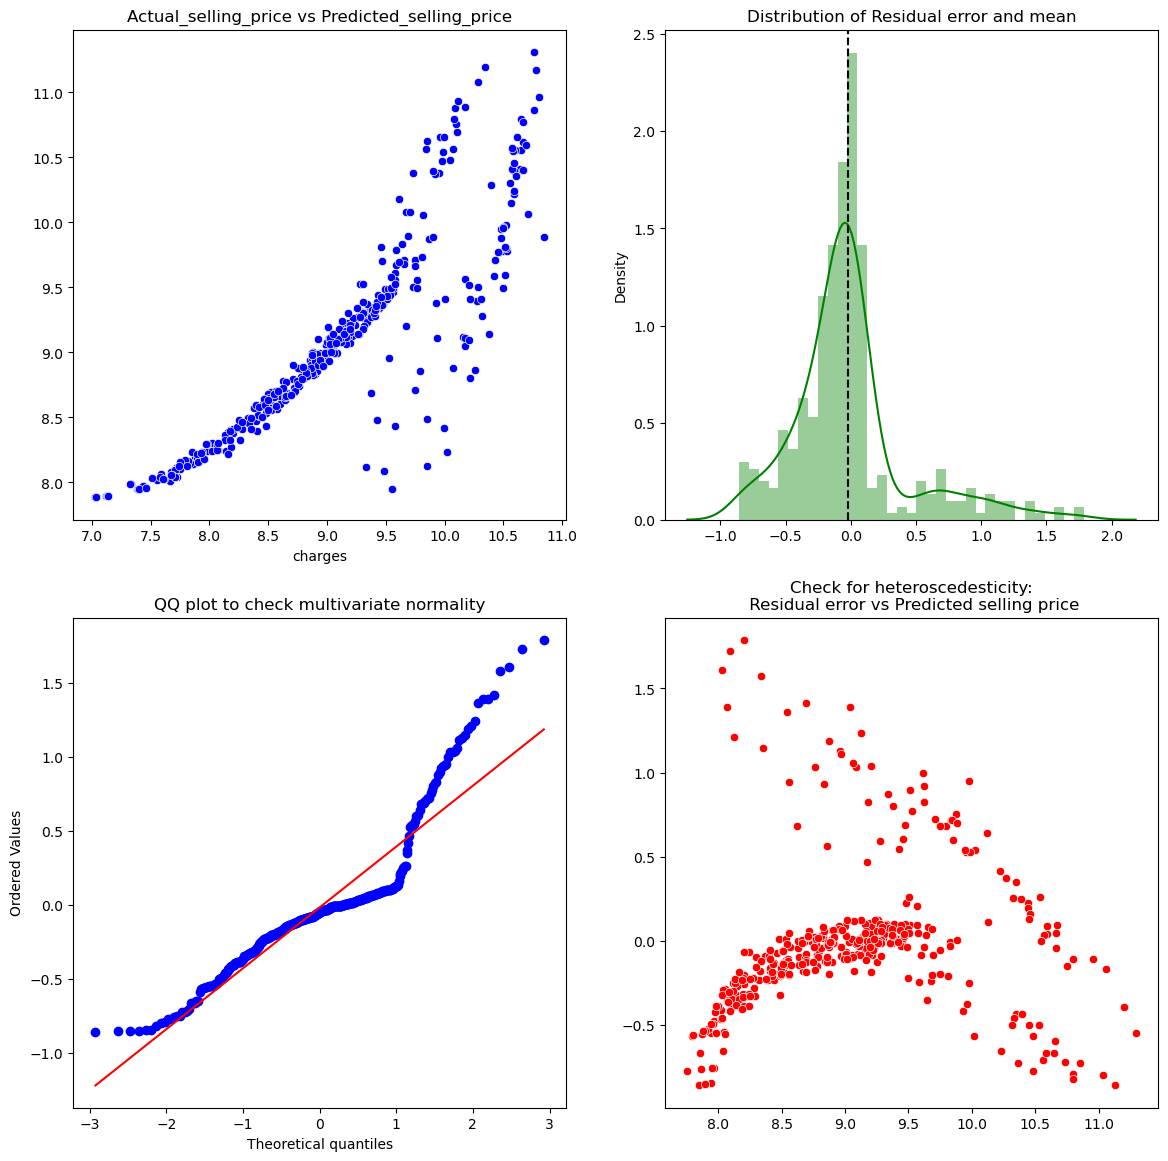

In [58]:
# check for linearity

fi = plt.figure(figsize = (14,14))

ax = fi.add_subplot(221)
sns.scatterplot(y_test, y_pred_ols, ax = ax, color = 'b')
ax.set_title('Actual_selling_price vs Predicted_selling_price')

# check for residual normality and mean
ax = fi.add_subplot(222)
sns.distplot((y_test - y_pred_ols), ax= ax, color = 'g')
ax.axvline((y_test - y_pred_ols).mean(), color = 'k', linestyle  = '--')
ax.set_title("Distribution of Residual error and mean")

# check for Mutlivariate Normality
ax = fi.add_subplot(223)

import scipy.stats as stats
stats.probplot((y_test - y_pred_ols), plot = ax)
ax.set_title("QQ plot to check multivariate normality")
# plt.show()

# check heteroscedesticity
ax = fi.add_subplot(224)
sns.scatterplot(y = (y_test - y_pred_ols), x = y_pred_test, ax = ax, color = 'r')
ax.set_title('Check for heteroscedesticity:\n Residual error vs Predicted selling price')



In [59]:
# check for multicollinearity

VIF_sk = 1 / (1 - r2_score_test)
VIF_sk

4.536561945911138

- The relationship between actual and predicted values seems to be curved. This implies that check for linearity failed.
- Mean of the residual error is 0 but the plot appears to be rightly skewed. Hence, normal distribution of residual errors failed.
- Multivariate normality check also failed because the distribution is not a straight line.
- There is Heteroscedesticity present, this means that error will increase after a certain point.
- VIF < 5, this means that there is no multicollinearity.

2. OLS LR model validation

Text(0.5, 1.0, 'Check for heteroscedesticity:\n Residual error vs Predicted selling price')

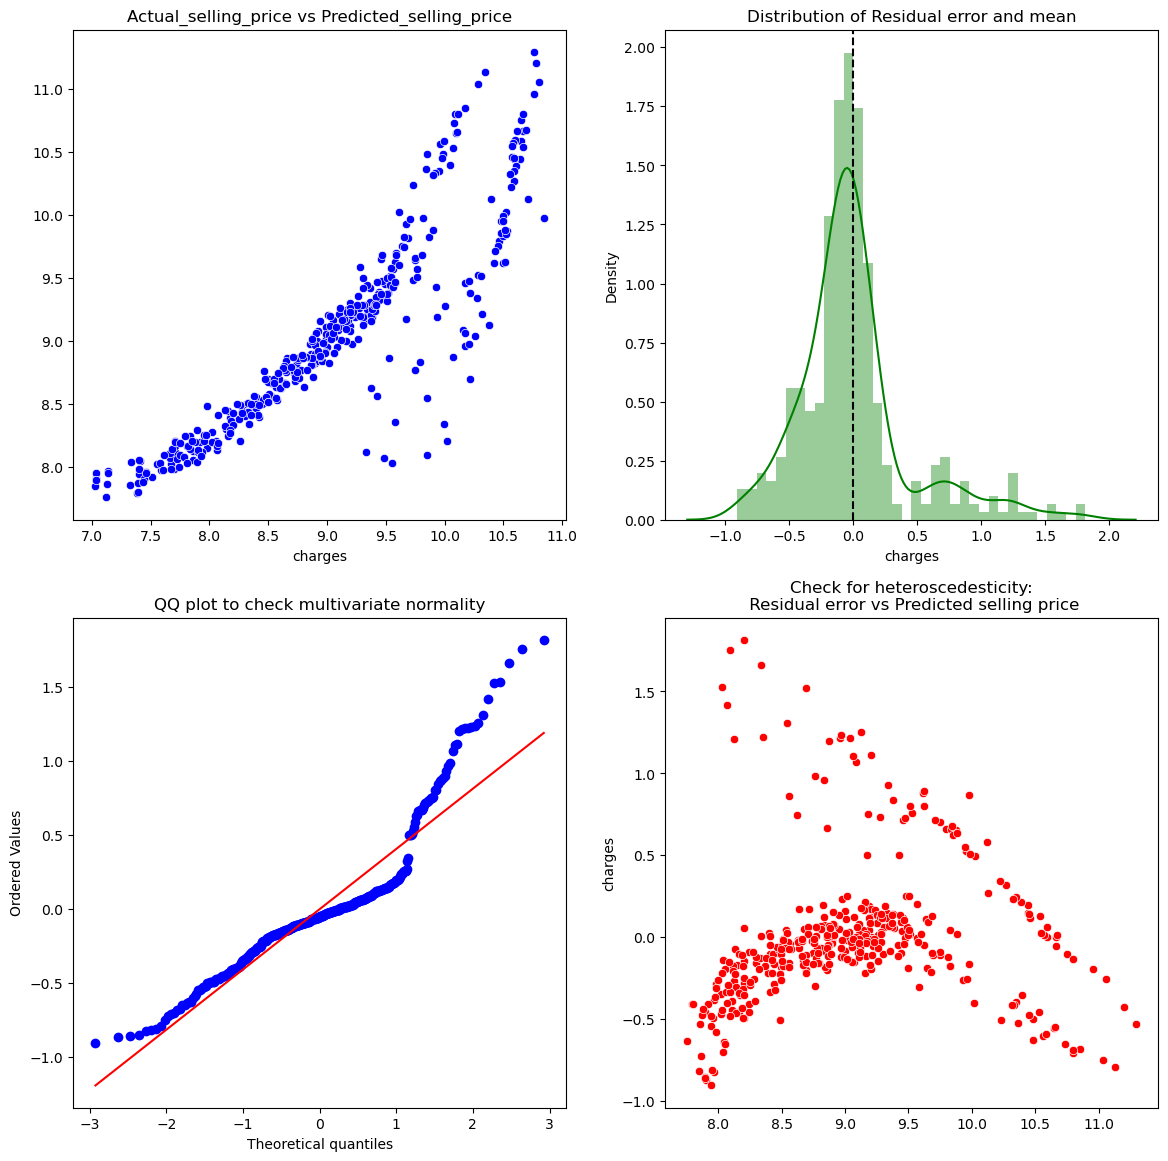

In [60]:
# check for linearity

fi = plt.figure(figsize = (14,14))

ax = fi.add_subplot(221)
sns.scatterplot(y_test, y_pred_test, ax = ax, color = 'b')
ax.set_title('Actual_selling_price vs Predicted_selling_price')

# check for residual normality and mean
ax = fi.add_subplot(222)
sns.distplot((y_test - y_pred_test), ax= ax, color = 'g')
ax.axvline((y_test - y_pred_test).mean(), color = 'k', linestyle  = '--')
ax.set_title("Distribution of Residual error and mean")

# check for Mutlivariate Normality
ax = fi.add_subplot(223)

import scipy.stats as stats
stats.probplot((y_test - y_pred_test), plot = ax)
ax.set_title("QQ plot to check multivariate normality")
# plt.show()

# check heteroscedesticity
ax = fi.add_subplot(224)
sns.scatterplot(y = (y_test - y_pred_test), x = y_pred_test, ax = ax, color = 'r')
ax.set_title('Check for heteroscedesticity:\n Residual error vs Predicted selling price')



In [61]:
# check for multicollinearity
VIF_ols = 1/(1- r2_score_ols)
VIF_ols

4.111670157538527

There doesn't appears to be a significant difference in the outcomes of validation by model from sklearrn  and OLS.

3. LR model from normal equation validation

Text(0.5, 1.0, 'Check for heteroscedesticity:\n Residual error vs Predicted selling price')

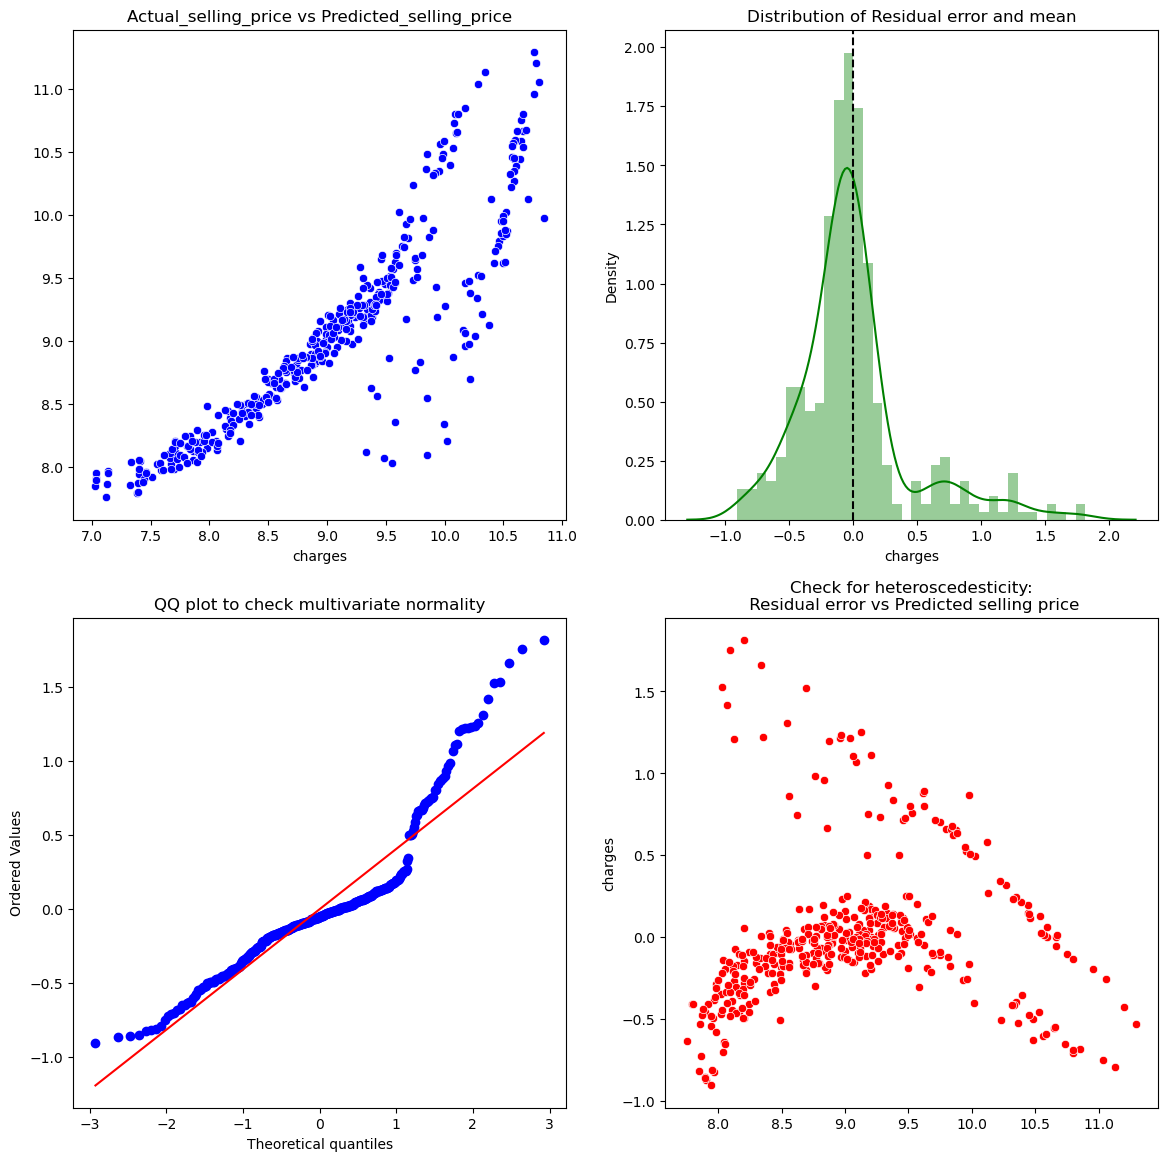

In [62]:
# check for linearity

fi = plt.figure(figsize = (14,14))

ax = fi.add_subplot(221)
sns.scatterplot(y_test, y_pred_norm, ax = ax, color = 'b')
ax.set_title('Actual_selling_price vs Predicted_selling_price')

# check for residual normality and mean
ax = fi.add_subplot(222)
sns.distplot((y_test - y_pred_norm), ax= ax, color = 'g')
ax.axvline((y_test - y_pred_norm).mean(), color = 'k', linestyle  = '--')
ax.set_title("Distribution of Residual error and mean")

# check for Mutlivariate Normality
ax = fi.add_subplot(223)

import scipy.stats as stats
stats.probplot((y_test - y_pred_norm), plot = ax)
ax.set_title("QQ plot to check multivariate normality")
# plt.show()

# check heteroscedesticity
ax = fi.add_subplot(224)
sns.scatterplot(y = (y_test - y_pred_norm), x = y_pred_test, ax = ax, color = 'r')
ax.set_title('Check for heteroscedesticity:\n Residual error vs Predicted selling price')


In [63]:
# Multivariate collinearity
VIF_norm = 1 /(1 - r2_score_norm)
VIF_norm

4.536561945911126

#### Which model to choose?

In [64]:
print('R2_score from sklearn:',r2_score_test)
print('R2_score from OLS:',r2_score_ols)
print('R2_score from normal equation:',r2_score_norm)

R2_score from sklearn: 0.7795687545055319
R2_score from OLS: 0.7567898295133053
R2_score from normal equation: 0.7795687545055313


We can choose either of the model, as all three of the models performance is almost same. But if we are to choose the model based on R_square score then we'll choose: either sklearn or model with normal equation. <br>
<br>
But for the datset that is huge and involve various variables, it is better to choose sklearn.